# Inhibition-stabilised network 

Ta-Chu Kao and Guillaume Hennequin 

In this notebook, we inspect some of the key properties of an inhibition-stabilised network (ISN), 
proposed and described in [Hennequin et al., 2014](https://www.sciencedirect.com/science/article/pii/S0896627314003602).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from plotlib import load_plot_setting, plot_eig
from lib import Gramians 
from scipy.integrate import odeint
load_plot_setting()

ModuleNotFoundError: No module named 'plotlib'

In [ ]:
# load connectivity matrix W; there are a total of n neurons.
isn_name = "isn"
W = np.loadtxt('isn.txt')
n, _ = np.shape(W)

In [ ]:
W.shape

(100, 100)

### E-I Connectivity

We plot the connectivity matrix $W$ of an example inhibition-stabilised network. 
Note that the connectivity matrix obeys Dale's rule and has sparse connections.

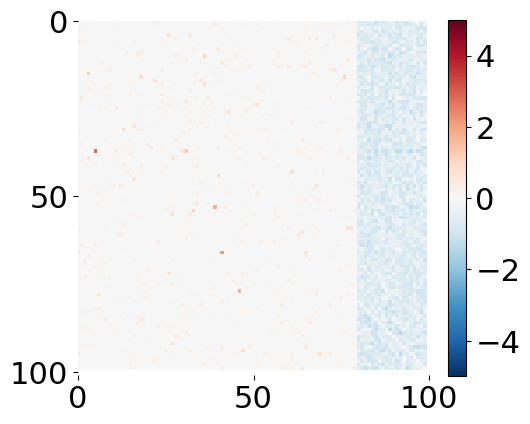

In [ ]:
plt.figure(figsize=(5,5))
im = plt.imshow(W,cmap=plt.cm.RdBu_r)
plt.xlim(0,n+1)
plt.ylim(n+1,0)
plt.yticks(np.arange(0,n+1,n/2))
plt.yticks(np.arange(0,n+1,n/2))
plt.box(on=False)
plt.clim(-5,5)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.show()

### Stability
We plot the eigenvalues of $W$ below. Note that the eigenvalue with the largest real part lies left of $1$, which makes $A = I - W$ stable.

In [ ]:
W_evals, _ = np.linalg.eig(W)
A_evals, _ = np.linalg.eig(W-np.eye(n))
#plot_eig(W_evals)
plot_eig(A_evals)
print("spectral abscissa = %3f < 0" % max(W_evals.real))

NameError: name 'W' is not defined

### Sensitive Directions

Consider linear dynamics where the network's activity evolves according to 

$$\displaystyle \dot{x} = Ax,$$

where $A = (I-W)/\tau$. 
To calculate the iniitial directions from which the network dynamics is strongly amplified,
we calculate the observability gramian 

$$\displaystyle Q = \int_0^\infty e^{A^Tt}e^{At} dt$$

by solving the Lyapunov equation:

$$A^TQ + QA + I = 0.$$

Note that the total energy evoked by the dynamics from initial condition $x_0$ is equal to 

$$\displaystyle \epsilon= \int_0^\infty x(t)^Tx(t) dt =\int_0^\infty x_0^T e^{A^Tt}e^{At} x_0 dt = x_0^T Q x_0$$

Since $Q$ is symmetric postive semidefinite, to find the directions $x_0$ that maximises the energy evoked, we simply calculate the eigenvalues and eigenvectors of $Q$;
the top eigenvector of $Q$ is the direction from which the most energy is evoked.




In [ ]:
A = (W - np.eye(n)) / 150e-3
# compute the gramians
G = Gramians(A)
# get the observability gramian OG
OG = G.O
# get the eigenvalues and eigenvectors of the observability gramian
Q_evals = OG.evals
Q_evecs = OG.modes

Next, we plot the total energy evoked if we initialise the system $x_0$ in the $n^{th}$ eigenvector of $Q$.

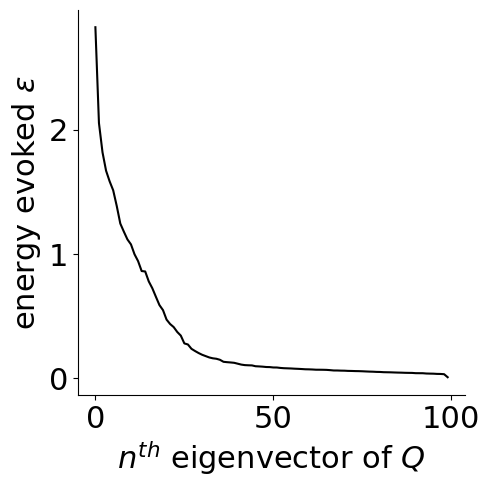

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel("energy evoked $\epsilon$")
plt.xlabel("$n^{th}$ eigenvector of $Q$")
plt.plot(Q_evals, "k")
plt.show()

Below, we plot the trajectories of ten neurons starting from different initial conditions.
Note that the activity transients evoked from the top eigenvectors of $Q$ is much stronger than that evoked from the bottom ones. 

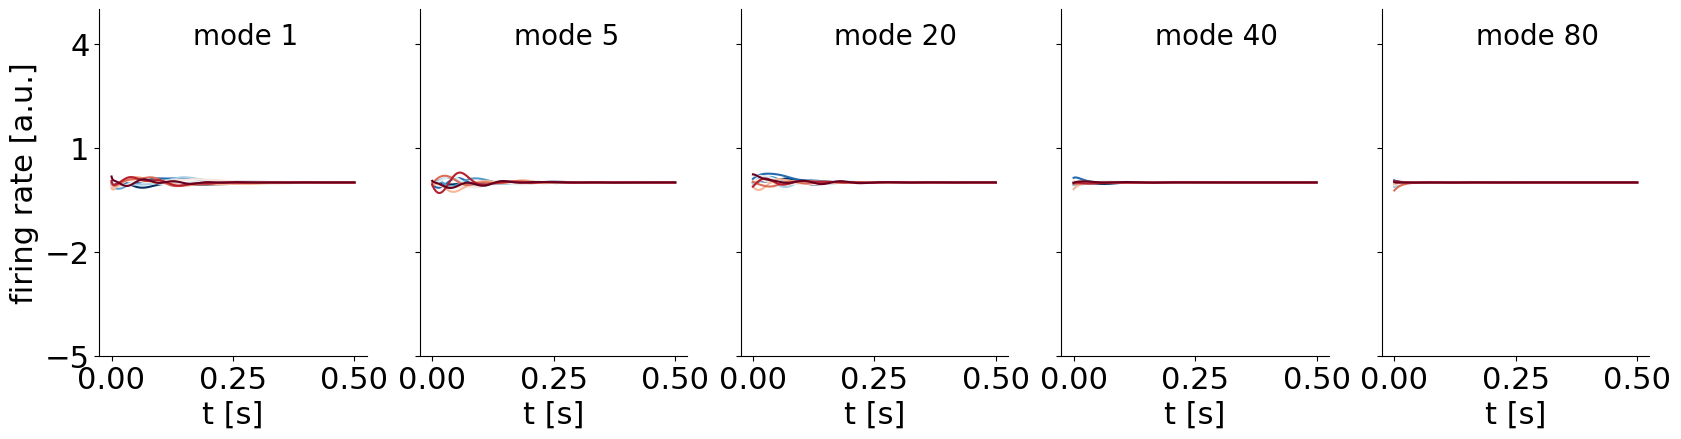

(501,)


In [ ]:
tau = 150e-3
tau = 200e-3
tau = 150e-3
tau = 20e-3
#tau = 1
phi = lambda x: x # rate function 
def f(x,t):
    return (-x + W.dot(phi(x))) / tau 
figsize=(20,4.5)
tf = 0.5 # simulate for 500ms
dt = 1e-3
n_steps = int(tf/dt) + 1
indices = [int(idx) for idx in [0, 0.05*n-1, 0.2*n-1, 0.4*n-1, 0.8*n-1]]

fig, axes = plt.subplots(1,len(indices), figsize=figsize, sharey=True)
axes[0].set_ylabel("firing rate [a.u.]")
axes[0].set_yticks(np.arange(-5,5.1,3))
ts = np.linspace(0,tf,n_steps)
for i, m in enumerate(indices):
    x0 = Q_evecs[:,m]
    xs = odeint(f,x0,ts)
    rs = phi(xs) 
    axes[i].set_ylim(-5,5)
    axes[i].set_xlabel("t [s]")
    axes[i].set_xticks(np.arange(0,0.51,0.25))
    axes[i].text(0.35,0.9, "mode %i" % (m+1), transform=axes[i].transAxes, fontsize=20)
    idxs = range(0,n,10)
    colors=iter(plt.cm.RdBu_r(np.linspace(0,1,len(idxs))))
    for j in idxs:
        c=next(colors)
        axes[i].plot(ts,rs[:,j],c=c)
        
plt.show()

print(ts.shape)

In [ ]:
ts = np.linspace(0, 0.5, 50)
print(ts)

[0.         0.01020408 0.02040816 0.03061224 0.04081633 0.05102041
 0.06122449 0.07142857 0.08163265 0.09183673 0.10204082 0.1122449
 0.12244898 0.13265306 0.14285714 0.15306122 0.16326531 0.17346939
 0.18367347 0.19387755 0.20408163 0.21428571 0.2244898  0.23469388
 0.24489796 0.25510204 0.26530612 0.2755102  0.28571429 0.29591837
 0.30612245 0.31632653 0.32653061 0.33673469 0.34693878 0.35714286
 0.36734694 0.37755102 0.3877551  0.39795918 0.40816327 0.41836735
 0.42857143 0.43877551 0.44897959 0.45918367 0.46938776 0.47959184
 0.48979592 0.5       ]


### Summary and outlook 

In this notebook, we analysed the spectrum and thus the stability of an example inhibition stabilised network. By calculating the eigenvectors of observability gramian, we found the directions from which the network evolving linearly is most strongly amplified.
In the next notebook **01_create**, we build an inhibition-stabilised network (ISN) from scratch.

In [ ]:
# Produce a positive weight matrix in uniform distribution to generate Wout and then save W and Wout and Win as pickle dump
import pickle
from scipy.linalg import solve_lyapunov

num_mats = 100
sys_mats_wrec = []
sys_mats_wout = []
sys_mats_readout = []
sys_mats_grammian = []
S = 8
N = W.shape[0]
for i in range(num_mats):
    Wrec = (W - np.eye(N)) / tau
    
    Wout = np.zeros((S, N))  # (states X neuron dim)
    # only the rwos 2 and 6 of Wout should be filled with normal random numbers (for fx and fy actuation states)
    Wout[2, :] = np.random.normal(0, 0.05/np.sqrt(1/N), (1, N))
    Wout[6, :] = np.random.normal(0, 0.05/np.sqrt(1/N), (1, N))

    Wro = np.concatenate((Wout[2:3, :], Wout[6:7, :]), axis=0)  # (3 X 11)  

    sys_mats_wrec.append(Wrec)
    sys_mats_wout.append(Wout)
    sys_mats_readout.append(Wro)

    # compute the controllability grammian of the readout
    b = np.eye(N) 
    P = solve_lyapunov(Wrec, -b.dot(b.T))
    #P = control.lyap(Wrec, np.eye(N), method='scipy')

    # compute controllability grammian of the readout
    energy = np.trace(Wout @ P @ Wout.T) / 2

    sys_mats_grammian.append(energy)






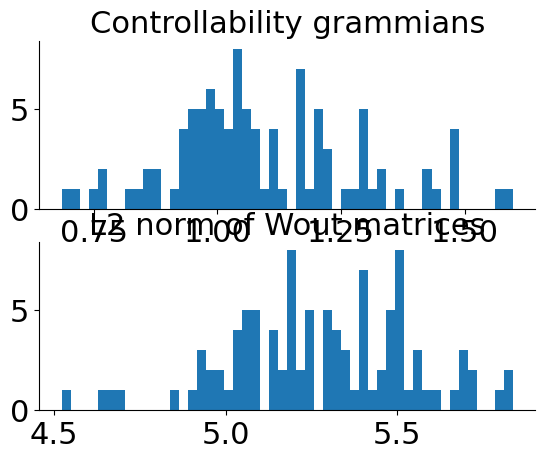

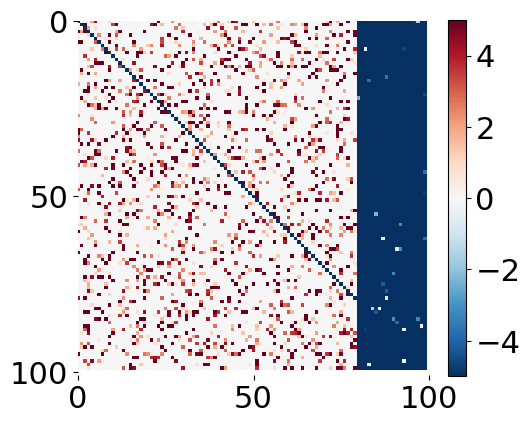

100 100 (100, 100) (8, 100)


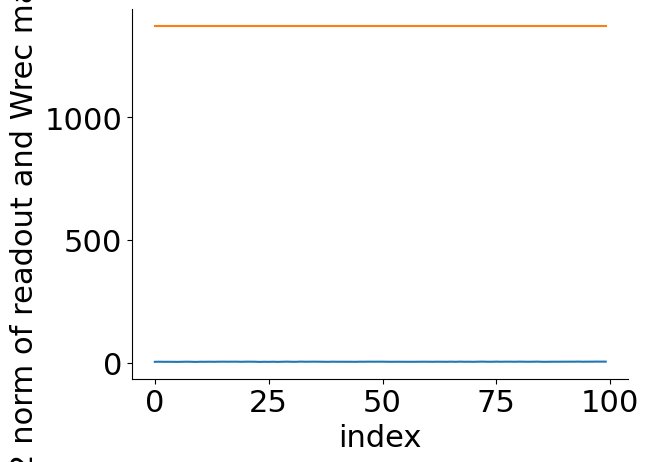

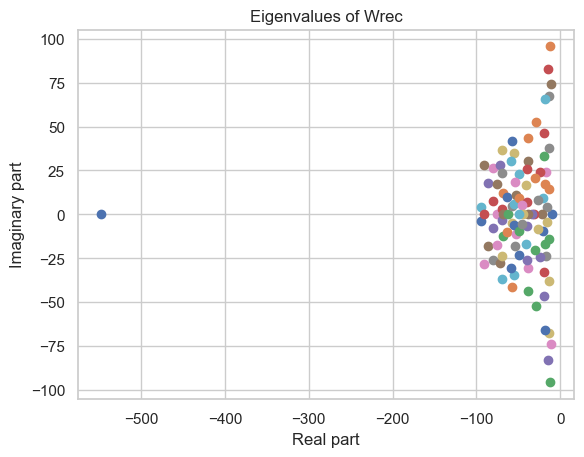

In [ ]:
import seaborn as sns


# plot the histogram of the grammian values and norm of wout in subplots
fig, axs = plt.subplots(2, 1)
axs[0].hist(sys_mats_grammian, bins=50)
axs[0].set_title('Controllability grammians')
axs[1].hist(np.linalg.norm(sys_mats_readout, 2, axis=(1,2)), bins=50)
axs[1].set_title('L2 norm of Wout matrices')
plt.show()

# plot the heatmap of the Wrec matrix
plt.figure(figsize=(5,5))
im = plt.imshow(Wrec,cmap=plt.cm.RdBu_r)
plt.xlim(0,n+1)
plt.ylim(n+1,0)
plt.yticks(np.arange(0,n+1,n/2))
plt.yticks(np.arange(0,n+1,n/2))
plt.box(on=False)
plt.clim(-5,5)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.show()


# Sort the indices of sys_mats_grammian based on the value of the corresponding entry
ranked_indices = []

np_grammian = np.array(sys_mats_grammian)
sorted_indices = np.argsort(np_grammian)
#print('sorted indices: ', np_grammian[sorted_indices])

# sort the wrec and wout matrices based on the sorted indices
sorted_wrec = []
sorted_readout = []
sorted_wout = []
for i in range(num_mats):
    sorted_wrec.append(sys_mats_wrec[sorted_indices[i]])
    sorted_readout.append(sys_mats_readout[sorted_indices[i]])
    sorted_wout.append(sys_mats_wout[sorted_indices[i]])


with open("C:/Users/kalidindi/OneDrive - UCL/Documents/GitHub/FNRSmain/OptRNNctrl_ISN/datastore/Smallweights/ISNnets", "wb") as f:
    pickle.dump(sorted_wrec, f)
    pickle.dump(sorted_wout, f)


with open("C:/Users/kalidindi/OneDrive - UCL/Documents/GitHub/FNRSmain/OptRNNctrl_ISN/datastore/Smallweights/ISNnets", "rb") as f:
    wrec_pickle = pickle.load(f)
    wout_pickle = pickle.load(f)

print(len(wrec_pickle), len(wout_pickle), wrec_pickle[0].shape, wout_pickle[0].shape)



# compute the L2 norm of the Wrec matrices
l2norm_readout = []
l2norm_wrec = []
for i in range(num_mats):
    l2norm_readout.append(np.linalg.norm(sorted_readout[i], 2))
    l2norm_wrec.append(np.linalg.norm(sorted_wrec[i], 2))

plt.figure()
plt.plot(l2norm_readout)
plt.plot(l2norm_wrec)
plt.xlabel('index')
plt.ylabel('L2 norm of readout and Wrec matrices')
plt.show()

# analyze the properties of the weights Wrec and Wout
# first, compute the eigen values of Wrec
eigvals, eigvecs = np.linalg.eig(Wrec)

# plot the eigen values
sns.set(style='whitegrid')
plt.figure()
for i in range(N):
    plt.plot(eigvals[i].real, eigvals[i].imag, 'o', label='Eigenvalue '+str(i+1))
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Eigenvalues of Wrec')
plt.show()

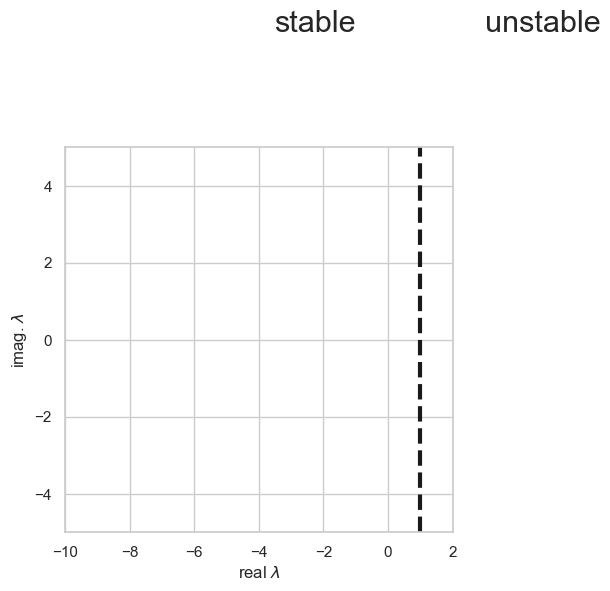

spectral abscissa = -10.156487 < 0


In [ ]:
W_evals, _ = np.linalg.eig((W - np.eye(n))/tau)
plot_eig(W_evals)
print("spectral abscissa = %3f < 0" % max(W_evals.real))

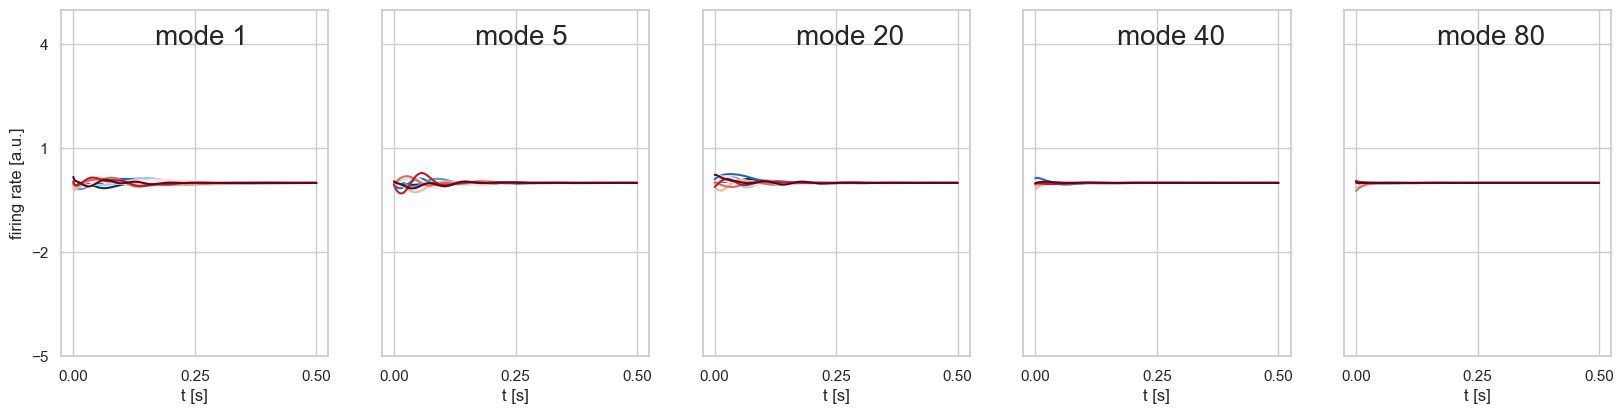

[ 0.04908693  0.06726503  0.04561676 -0.10810074  0.12644264 -0.00333984
 -0.13453635  0.090973   -0.13470516  0.0929043   0.05872097 -0.06483045
 -0.0036458  -0.20256397 -0.19483168 -0.02054881 -0.0349735  -0.1747903
  0.01456426  0.19698597 -0.11661448 -0.03585446  0.04078058  0.03945607
  0.08609556 -0.14552836 -0.08881685 -0.12991488 -0.12347238 -0.08421264
 -0.13077414  0.09665043 -0.03951955  0.07843071  0.03821979  0.13990714
 -0.01222016  0.10461835  0.10349251  0.01797809 -0.07001056 -0.13872007
 -0.00382421  0.25633079  0.27698432 -0.03009145  0.00793003  0.10434167
  0.16035569 -0.0604313  -0.06140126 -0.07948676  0.0358498   0.04467583
  0.08904549  0.14584813 -0.05956522  0.18335955  0.01619161  0.05369266
 -0.04273061 -0.00373321 -0.0065606  -0.21946443  0.13029635  0.02191472
  0.14381601 -0.06780079 -0.10065098  0.00909733 -0.23126551  0.0109295
 -0.22799109  0.0730029  -0.11189116 -0.03248523  0.11521193 -0.08562458
  0.14162934  0.01684748  0.04363107  0.05916745 -0.0

In [ ]:

phi = lambda x: x # rate function 
def f(x,t):
    return (Wrec)@ x
figsize=(20,4.5)
tf = 0.5 # simulate for 500ms
dt = 1e-3
n_steps = int(tf/dt) + 1
indices = [int(idx) for idx in [0, 0.05*n-1, 0.2*n-1, 0.4*n-1, 0.8*n-1]]

fig, axes = plt.subplots(1,len(indices), figsize=figsize, sharey=True)
axes[0].set_ylabel("firing rate [a.u.]")
axes[0].set_yticks(np.arange(-5,5.1,3))
ts = np.linspace(0,tf,n_steps)
for i, m in enumerate(indices):
    x0 = Q_evecs[:,m]
    xs = odeint(f,x0,ts)
    rs = phi(xs) 
    axes[i].set_ylim(-5,5)
    axes[i].set_xlabel("t [s]")
    axes[i].set_xticks(np.arange(0,0.51,0.25))
    axes[i].text(0.35,0.9, "mode %i" % (m+1), transform=axes[i].transAxes, fontsize=20)
    idxs = range(0,n,10)
    colors=iter(plt.cm.RdBu_r(np.linspace(0,1,len(idxs))))
    for j in idxs:
        c=next(colors)
        axes[i].plot(ts,rs[:,j],c=c)
        
plt.show()

print(Q_evecs[:, m])